<h1 style="text-align: center;">Data Preparation</h1>
<h2 style="text-align: center;">Bank Marketing</h2>

*Discentes:*

    *   Arthur Bezerra Calado
    *   Gabriel D'assumpção de Carvalho
    *   Pedro Henrique Sarmento de Paula

*Data:* 24/07/2024

---

# Introdução

A preparação dos dados é uma etapa fundamental no ciclo de vida de um projeto de ciência de dados. O objetivo principal desta fase é transformar dados brutos e heterogêneos em um formato limpo e estruturado, pronto para ser utilizado na modelagem. Esta transformação é essencial para garantir a acurácia e a eficiência dos modelos preditivos que serão desenvolvidos posteriormente. A preparação dos dados envolve várias atividades, incluindo a limpeza, a transformação e a integração dos dados, cada uma delas crucial para eliminar inconsistências e preencher lacunas identificadas na fase de Entendimento dos Dados.

A importância da preparação dos dados não pode ser subestimada, pois dados mal preparados podem levar a modelos imprecisos e conclusões enganosas. A fase de Entendimento dos Dados forneceu insights valiosos sobre a qualidade e a estrutura dos dados, identificando problemas como dados faltantes, outliers e a necessidade de normalização. Agora, com essas informações, podemos proceder à preparação dos dados de maneira sistemática e eficaz. Esta fase conecta diretamente com as fases anteriores de Entendimento do Negócio e Entendimento dos Dados, assegurando que as ações tomadas sejam alinhadas com os objetivos do projeto e baseadas em uma compreensão profunda dos dados disponíveis.

# Revisão das Propostas de Alterações

Durante a fase de Entendimento dos Dados, várias propostas de alterações foram sugeridas para melhorar a qualidade dos dados. Entre as principais propostas estavam:

- Remoção de Outliers: Identificamos valores extremos que poderiam distorcer as análises e os resultados dos modelos. A remoção desses outliers foi justificada pela análise estatística que mostrou que esses valores não representavam o comportamento típico dos dados.

- Imputação de Valores Ausentes: Detectamos que alguns registros tinham dados faltantes. A imputação desses valores é crucial para manter a integridade do conjunto de dados. Métodos como imputação pela média, mediana ou modas foram sugeridos com base na natureza das variáveis afetadas.

- Transformação de Variáveis Categóricas em Numéricas: Variáveis categóricas foram identificadas como necessárias para transformação, uma vez que a maioria dos algoritmos de aprendizado de máquina requer variáveis numéricas. Técnicas como one-hot encoding foram recomendadas para essa transformação.

- Normalização e Padronização de Dados: Algumas variáveis precisavam ser normalizadas ou padronizadas para garantir que todas estivessem na mesma escala, facilitando o processo de modelagem e aumentando a precisão dos modelos.

Essas propostas foram fundamentadas na análise dos dados realizada anteriormente e visavam eliminar inconsistências, melhorar a qualidade dos dados e prepará-los para a modelagem preditiva.

# Implementação das Alterações

A implementação das ações de preparação dos dados seguiu um processo detalhado e sistemático:

## Biblioteca utilizadas

1) pandas -> manipulação de dados;

2) numpy -> cálculos estatísticos;

4) matplotlib -> gráficos;

5) seaborn -> gráficos;

6) scipy -> transformação de variável;

7) warnings -> remoção de avisos

In [ ]:
# Instalação das bibliotecas

# %pip install pandas

# %pip install ucimlrepo

# %pip install numpy

# %pip install scipy

# %pip install matplotlib

# %pip install seaborn

In [137]:
# Importação das bibliotecas

import pandas as pd

import numpy as np

from scipy.stats import boxcox
from scipy.stats import mstats

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

from ucimlrepo import fetch_ucirepo 

from IPython.display import display, Markdown

In [2]:
# Desativa todos os avisos
warnings.filterwarnings("ignore")

In [3]:
# Configurando o modo de exibição do pandas
pd.options.display.float_format = "{:.4f}".format

## Coletando os dados

In [54]:
# Baixando os dados
bank_marketing = fetch_ucirepo(id=222)

In [55]:
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets

In [56]:
# Criando variável que vai ter as variáveis transformada
Xt = X.copy()

## Remoção de Outliers

Utilizamos métodos estatísticos como o Interquartile Range (IQR) para identificar e remover outliers. Visualizações como boxplots foram geradas para ilustrar os dados antes e depois da remoção dos outliers.

In [ ]:
# FAZER AQUI 

## Imputação de Valores Ausentes

Aplicamos diferentes técnicas de imputação dependendo da variável. Por exemplo, para variáveis numéricas, usamos a média ou a mediana, e para variáveis categóricas, a moda.

In [ ]:
# FAZER AQUI

## Transformação de Variáveis Categóricas em Numéricas

Utilizamos one-hot encoding para transformar variáveis categóricas em variáveis numéricas

In [ ]:
# FAZER AQUI

## Normalização e Padronização de Dados

Aplicamos a normalização para escalas de 0 a 1 e a padronização para variáveis com diferentes unidades de medida

## Idade

A transformação aplicada à variável age consistiu em duas etapas principais. Primeiramente, para reduzir a assimetria positiva e lidar com outliers de idades extremas, foi utilizada a função logarítmica da variável age elevada a 1/2.15. Esta transformação ajudou a mitigar a influência dos valores extremos e a melhorar a simetria da distribuição.

Na etapa seguinte, a variável transformada foi submetida a uma winsorização com limites específicos para truncar os valores extremos. Os limites utilizados foram [0.003, 0.001], significando que os 0,3% dos menores valores foram substituídos pelo valor no percentil de 0,3%, e os 0,1% dos maiores valores foram substituídos pelo valor no percentil de 99,9%. Esse procedimento ajudou a reduzir o impacto dos outliers extremos na análise.

Após a winsorização, a variável foi normalizada para o intervalo [0, 1], a fim de padronizar a escala com as outras variáveis numéricas e facilitar a comparação e análise subsequente.

In [230]:
Xt['age'] = mstats.winsorize(np.log(X['age'])**(1/2.15), limits=[0.003, 0.001])
Xt['age'] = (Xt['age'] - Xt['age'].min()) / (Xt['age'].max() - Xt['age'].min())

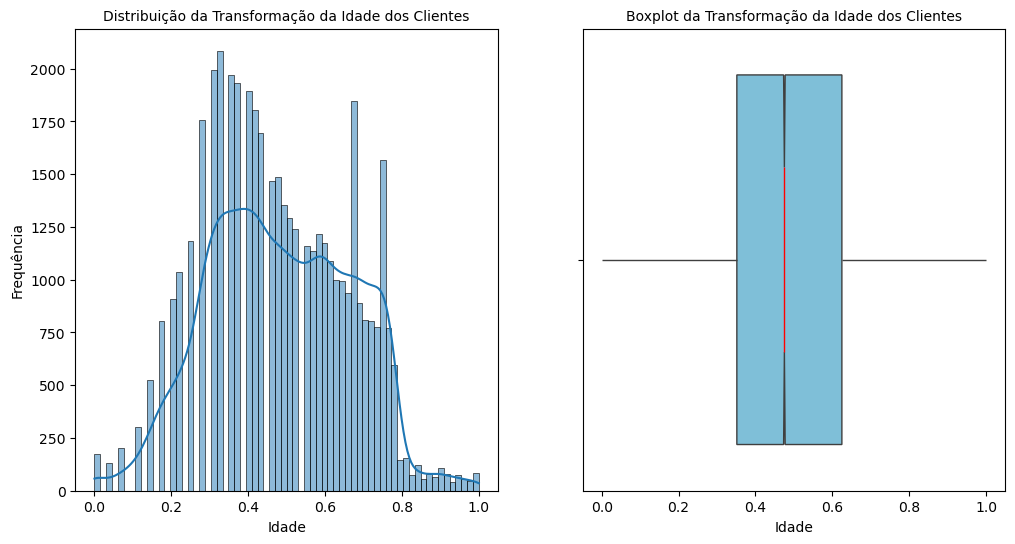

In [231]:
# Criação do grafico histograma e boxplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(Xt["age"], kde=True)
plt.title("Distribuição da Transformação da Idade dos Clientes", fontsize=10)
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(Xt["age"], orient='h', notch=True, showcaps=False,
boxprops={"facecolor": (0, .5, .7, .5)},
medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Transformação da Idade dos Clientes", fontsize=10)
plt.xlabel("Idade")
plt.show()

### Equilibrio

Para aprimorar a qualidade dos dados da variável *balance*, adotou-se uma abordagem em duas etapas. Primeiramente, foi aplicada a transformação do módulo seguida da raiz sétima. Especificamente, o valor absoluto da variável *balance* foi elevado a $\frac{1}{7}$ (ou seja, a raiz sétima). Essa transformação ajudou a reduzir significativamente a assimetria dos dados, embora não tenha eliminado completamente os outliers ou ajustado todas as observações com valor zero.

Em seguida, foi realizada a winsorização dos dados transformados com limites [0.1, 0.03]. Isso significa que os 10% dos valores mais baixos foram substituídos pelo valor no percentil de 10%, e os 3% dos valores mais altos foram substituídos pelo valor no percentil de 97%. Essa etapa visou minimizar o impacto dos outliers extremos.

Por fim, a variável *balance* foi normalizada para o intervalo [0, 1] para padronizar a escala com as demais variáveis numéricas e facilitar análises futuras.

In [222]:
Xt['balance'] = mstats.winsorize(np.sqrt(X['balance']**2) ** (1/7), limits=[0.1, 0.03])
Xt['balance'] = (Xt['balance'] - Xt['balance'].min()) / (Xt['balance'].max() - Xt['balance'].min())

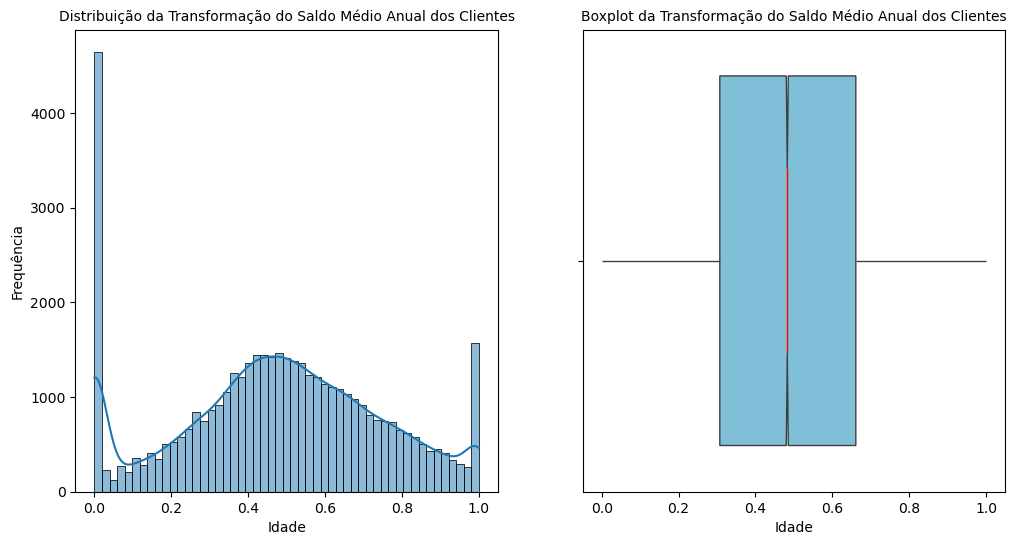

In [223]:
# Criação do grafico histograma e boxplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(Xt["balance"], kde=True)
plt.title("Distribuição da Transformação do Saldo Médio Anual dos Clientes", fontsize=10)
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(Xt["balance"], orient='h', notch=True, showcaps=False,
boxprops={"facecolor": (0, .5, .7, .5)},
medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Transformação do Saldo Médio Anual dos Clientes",  fontsize=10)
plt.xlabel("Idade")
plt.show()

## Duração

A variável *duration* também apresentava uma distribuição altamente assimétrica positiva, com a presença de numerosos outliers em valores elevados de duração de chamada. Para tratar essa questão, foi aplicada uma transformação da raiz quinta, seguida de winsorização nas extremidades. Especificamente, os 0,76% dos menores valores foram substituídos pelo valor no percentil de 0,76%, e os 1,3% dos maiores valores foram substituídos pelo valor no percentil de 98,7%. Essas transformações melhoraram a centralização da moda, mediana e média da variável. Além disso, foi realizada a normalização dos valores para o intervalo [0, 1].

In [184]:
Xt['duration'] = mstats.winsorize(X['duration']**(1/5), limits=[0.0076, 0.013])
Xt['duration'] = (Xt['duration'] - Xt['duration'].min()) / (Xt['duration'].max() - Xt['duration'].min())

In [143]:
Xt['duration'].describe()

count   45211.0000
mean        0.4758
std         0.2665
min         0.0000
25%         0.2847
50%         0.4579
75%         0.6567
max         1.0000
Name: duration, dtype: float64

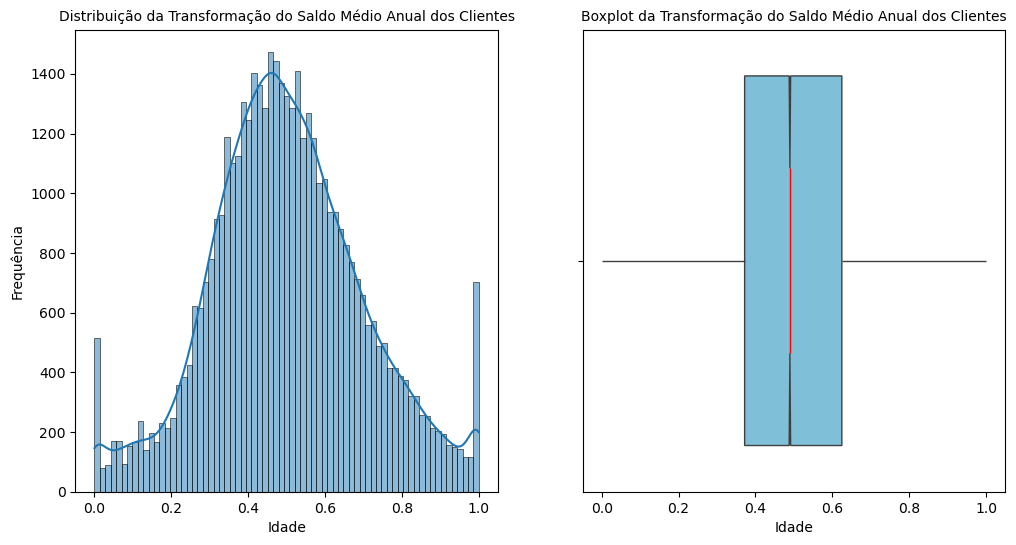

In [185]:
# Criação do grafico histograma e boxplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(Xt["duration"], kde=True)
plt.title("Distribuição da Transformação do Saldo Médio Anual dos Clientes", fontsize=10)
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(Xt["duration"], orient='h', notch=True, showcaps=False,
boxprops={"facecolor": (0, .5, .7, .5)},
medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Transformação do Saldo Médio Anual dos Clientes",  fontsize=10)
plt.xlabel("Idade")
plt.show()

### Anterior

In [138]:
Xt['previous'] = mstats.winsorize(X['previous'], limits=[0.05, 0.05])
Xt['previous'] = (Xt['previous'] - Xt['previous'].min()) / (Xt['previous'].max() - Xt['previous'].min())

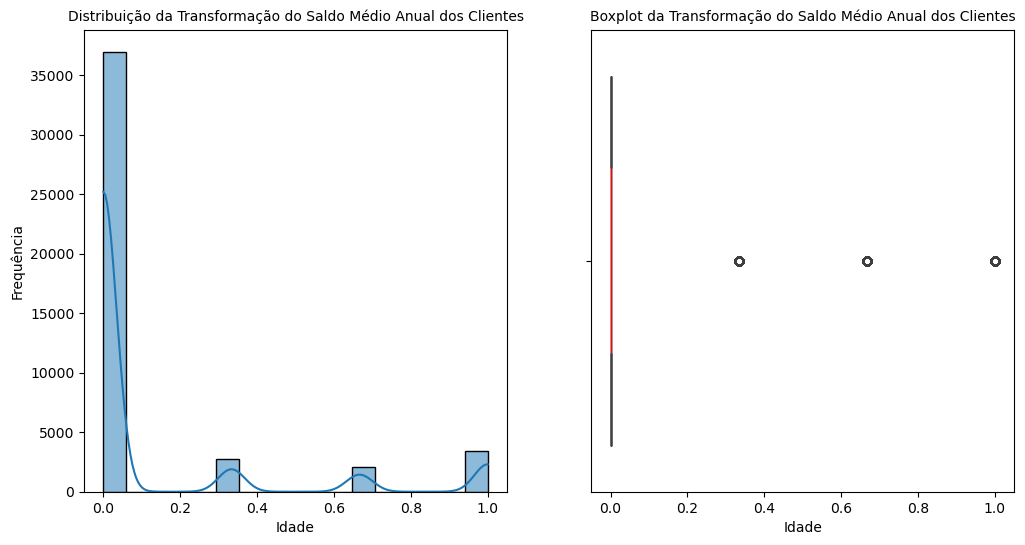

In [139]:
# Criação do grafico histograma e boxplot
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(Xt["previous"], kde=True)
plt.title("Distribuição da Transformação do Saldo Médio Anual dos Clientes", fontsize=10)
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(Xt["previous"], orient='h', notch=True, showcaps=False,
boxprops={"facecolor": (0, .5, .7, .5)},
medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Transformação do Saldo Médio Anual dos Clientes",  fontsize=10)
plt.xlabel("Idade")
plt.show()

In [ ]:
# FAZER AQUI

Essas ações foram documentadas e visualizações foram criadas para ilustrar o estado dos dados antes e depois das alterações, mostrando claramente as melhorias alcançadas.

# Resultados da Preparação dos Dados

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> FALTA FAZER <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

!!!!!!!!!!!!!!!!! MODELO DE TEXTO: 

Os resultados das ações de preparação dos dados foram significativos e mensuráveis. Após a remoção de outliers, a variância dos dados foi reduzida, resultando em uma distribuição mais uniforme e menos distorcida. A imputação de valores ausentes garantiu que não houvesse lacunas nos dados, melhorando a completude e a integridade dos dados. A transformação de variáveis categóricas em numéricas permitiu a utilização de uma maior variedade de algoritmos de aprendizado de máquina. As estatísticas descritivas pós-transformação mostraram um aumento na consistência dos dados.

Comparações entre os dados antes e depois da preparação destacaram melhorias substanciais na qualidade dos dados. A discussão sobre a qualidade dos dados preparados enfatizou a importância dessas ações para garantir que os dados estivessem prontos para a modelagem, com foco na completude, consistência e integridade dos dados.

# Conjunto de Treinamento e Validação

# Reflexões Críticas

A análise crítica das ações de preparação dos dados revelou que, em geral, as técnicas aplicadas melhoraram significativamente a qualidade dos dados. No entanto, enfrentamos alguns desafios, como a potencial introdução de vieses durante a imputação de valores ausentes e a possível perda de informações valiosas com a remoção de outliers. Reconhecemos que algumas das decisões tomadas podem ter impactos nos resultados dos modelos, e é essencial considerar abordagens alternativas e mais sofisticadas para lidar com esses desafios no futuro.

A eficácia das ações de preparação foi avaliada continuamente, e refletimos sobre possíveis melhorias, como a utilização de técnicas de imputação mais avançadas (ex.: KNN Imputer) e uma análise mais aprofundada dos outliers antes de sua remoção. Essas reflexões são importantes para melhorar continuamente a abordagem de preparação dos dados e garantir a construção de modelos mais robustos e precisos.

# Conclusão

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> FALTA FAZER <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9cbf65cb-016b-458a-bee9-1cc8843984e5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>